#CLUSTERING

In [ ]:
import os
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.datasets import mnist

from tqdm import tqdm
import keras
import librosa
import librosa.display
import random

import warnings
warnings.filterwarnings('ignore')


from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform,he_uniform

# from keras.engine.topology import Layer
from tensorflow.keras.layers import Layer, InputSpec
from keras.regularizers import l2
from keras import backend as K
from keras.utils import plot_model,normalize

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.cluster import KMeans

In [ ]:
!pip install pydub

## Creating chunks (similar to Approach 0, 1 & 2)

In [ ]:
####################################### MARTIAN AUDIO ###########################################

## Splitting the above segregated audios into chunks for training and testing data preparation ##

from pydub import AudioSegment
from pydub.utils import make_chunks



filename = "/content/drive/MyDrive/ROB 590/Audio files/Rover_Audio.wav"
myaudio = AudioSegment.from_wav( filename, "wav") 
chunk_length_ms = 3000 # pydub calculates in millisec
chunks = make_chunks(myaudio, chunk_length_ms) # Make chunks


for i,chunk in enumerate(chunks):
    chunk_name = "cluster_bit{0}.wav".format(i)
    print ("exporting", chunk_name)

    filename__ = "/content/drive/MyDrive/ROB 590/Audio files/CHUNKS_CLUSTERING" +'/cluster_chunk{0}.wav'.format(i)   
    chunk.export(filename__, format="wav")

print("---------------------------")

                                                            





exporting cluster_bit0.wav
exporting cluster_bit1.wav
exporting cluster_bit2.wav
exporting cluster_bit3.wav
exporting cluster_bit4.wav
exporting cluster_bit5.wav
exporting cluster_bit6.wav
exporting cluster_bit7.wav
exporting cluster_bit8.wav
exporting cluster_bit9.wav
exporting cluster_bit10.wav
exporting cluster_bit11.wav
exporting cluster_bit12.wav
exporting cluster_bit13.wav
exporting cluster_bit14.wav
exporting cluster_bit15.wav
exporting cluster_bit16.wav
exporting cluster_bit17.wav
exporting cluster_bit18.wav
exporting cluster_bit19.wav
exporting cluster_bit20.wav
exporting cluster_bit21.wav
exporting cluster_bit22.wav
exporting cluster_bit23.wav
exporting cluster_bit24.wav
exporting cluster_bit25.wav
exporting cluster_bit26.wav
exporting cluster_bit27.wav
exporting cluster_bit28.wav
exporting cluster_bit29.wav
exporting cluster_bit30.wav
exporting cluster_bit31.wav
exporting cluster_bit32.wav
exporting cluster_bit33.wav
exporting cluster_bit34.wav
exporting cluster_bit35.wav
ex

In [ ]:
# SANITY CHECK shape of a chunk
y1,sr1 = librosa.load('/content/drive/MyDrive/ROB 590/Audio files/CHUNKS_CLUSTERING/cluster_chunk5.wav',sr=None)
y1.shape

(144000,)

## Elbow method to check number of clusters

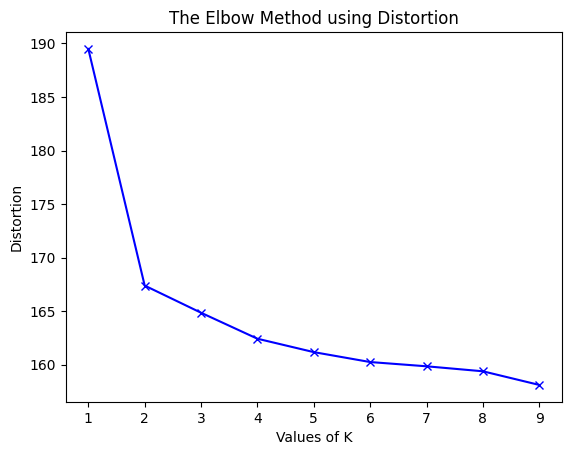

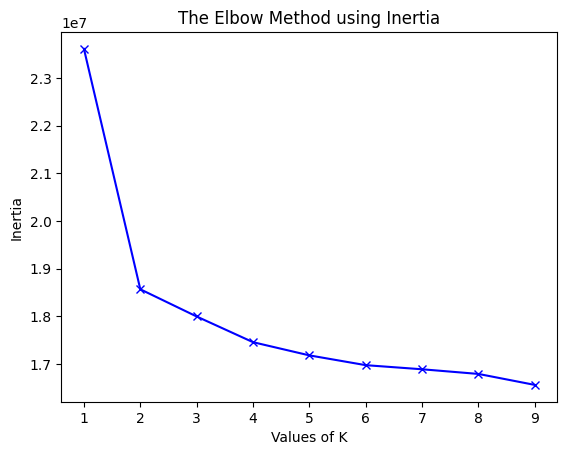

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(scaled_features)
    kmeanModel.fit(scaled_features)
    distortions.append(sum(np.min(cdist(scaled_features, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / scaled_features.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(scaled_features, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / scaled_features.shape[0]
    mapping2[k] = kmeanModel.inertia_


plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## Cluster formation and Visualization

(36096,)
[[-2.58564432 -2.52183868 -2.21738979 ...  0.75581719  0.73035605
   0.48789938]
 [-2.58564432 -2.52183868 -2.21738979 ...  0.75581719  0.73035605
   0.48789938]
 [-0.72215719 -1.05459395 -1.29723206 ...  1.70337808  0.71596889
   0.48693491]
 ...
 [ 1.21559355  1.12959585  1.01996426 ... -1.01290709 -0.70629703
   0.04398339]
 [-0.69140869  0.10569609  0.72029196 ...  1.12551408 -0.61827671
  -0.65011614]
 [-0.69140869  0.10569609  0.72029196 ...  1.12551408 -0.61827671
  -0.65011614]]


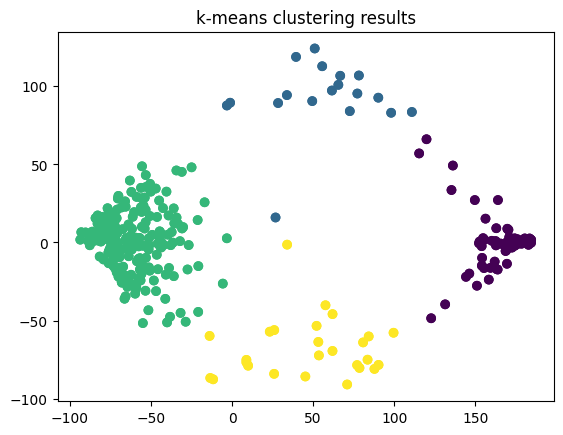

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import librosa
import os

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


# set the directory where audio files are located
directory = '/content/drive/MyDrive/ROB 590/Audio files/CHUNKS_CLUSTERING'

# create empty arrays to store audio and features
audio = []
features = []

# loop through audio files
for file in os.listdir(directory):
    if file.endswith('.wav'):
        # load audio
        clip, sr = librosa.load(os.path.join(directory, file), sr=None)
        audio.append(clip)
        
        # extract features
        mfcc = librosa.feature.mfcc(y=clip, sr=sr,n_mfcc=128)
        
        ## other feature extraction metrics you can try, I found mfcc the most effective
        # spectral_centroid = librosa.feature.spectral_centroid(y=clip, sr=sr)
        # spectral_rolloff = librosa.feature.spectral_rolloff(y=clip, sr=sr)
        # zero_crossing_rate = librosa.feature.zero_crossing_rate(clip)
        
        # concatenate features
        features.append(np.concatenate((mfcc)))
        features.append(mfcc.flatten())

print(features[0].shape)


## Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print(scaled_features)


# Perform PCA to reduce the dimensionality of the data to 2D
pca = PCA(n_components=2)
features_pca = pca.fit_transform(scaled_features)

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, init='random', max_iter=2000, n_init='auto', random_state=0)
labels = kmeans.fit_predict(scaled_features)


# Visualize the clustering results on a 2D plot
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels)
plt.title('k-means clustering results')
plt.show()

